In [179]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sb
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [180]:
df = pd.read_csv("../data/selected_M_best50.csv")
df = df.drop_duplicates()
print(df.head())

   ILMN_1651296  ILMN_1654609  ILMN_1655864  ILMN_1657898  ILMN_1660357  \
0        9.3790       13.1600        9.1206        8.9263        9.5279   
1        9.3431       13.6183        9.6620        8.6274        9.5668   
2        8.7567       12.5893        8.9047        8.3385        8.6186   
3        8.7806       12.4219        8.7785        8.2053        8.4064   
4        8.5279       12.0954        8.4493        8.2168        8.4192   

   ILMN_1667500  ILMN_1670218  ILMN_1670638  ILMN_1671005  ILMN_1677756  ...  \
0        8.4448       11.3745       11.0382       11.4310        9.9916  ...   
1        8.3387       11.7645       11.4380       12.1278       10.5783  ...   
2        8.0199       10.2609        9.5454       10.5202        9.3776  ...   
3        8.0968       10.1913        9.4288       10.2085        8.4853  ...   
4        8.1602       10.0457        9.3820       10.1140        8.5531  ...   

   ILMN_1805111  ILMN_1812970  ILMN_1852793  ILMN_1875248  ILMN_2082

In [181]:
def map_results(inpt):
    if inpt == 'control':
        return 0;

    else:
        return 1;

In [182]:
df['Results'] = df['Results'].apply(map_results)
print(df.head())

   ILMN_1651296  ILMN_1654609  ILMN_1655864  ILMN_1657898  ILMN_1660357  \
0        9.3790       13.1600        9.1206        8.9263        9.5279   
1        9.3431       13.6183        9.6620        8.6274        9.5668   
2        8.7567       12.5893        8.9047        8.3385        8.6186   
3        8.7806       12.4219        8.7785        8.2053        8.4064   
4        8.5279       12.0954        8.4493        8.2168        8.4192   

   ILMN_1667500  ILMN_1670218  ILMN_1670638  ILMN_1671005  ILMN_1677756  ...  \
0        8.4448       11.3745       11.0382       11.4310        9.9916  ...   
1        8.3387       11.7645       11.4380       12.1278       10.5783  ...   
2        8.0199       10.2609        9.5454       10.5202        9.3776  ...   
3        8.0968       10.1913        9.4288       10.2085        8.4853  ...   
4        8.1602       10.0457        9.3820       10.1140        8.5531  ...   

   ILMN_1805111  ILMN_1812970  ILMN_1852793  ILMN_1875248  ILMN_2082

In [183]:

df.describe()

,ILMN_1651296,ILMN_1654609,ILMN_1655864,ILMN_1657898,ILMN_1660357,ILMN_1667500,ILMN_1670218,ILMN_1670638,ILMN_1671005,ILMN_1677756,...,ILMN_1805111,ILMN_1812970,ILMN_1852793,ILMN_1875248,ILMN_2082762,ILMN_2159384,ILMN_2203896,ILMN_2272857,ILMN_2359627,Results
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,8.963658,12.634358,8.840350,8.361906,8.984964,8.240606,10.621906,10.079049,10.812333,9.293271,...,8.303556,8.365388,10.993503,8.377289,10.579364,9.127508,9.943714,8.906776,8.425519,0.707143
std,0.507967,0.787855,0.551345,0.348476,0.548652,0.238972,0.829364,0.666381,0.782629,0.642800,...,0.321369,0.479864,0.903003,0.385426,0.766060,0.610215,0.937709,0.424639,0.383808,0.456707
min,8.172100,9.570600,7.867800,7.708100,8.049400,7.830800,8.247400,8.495100,8.556300,8.120700,...,7.772500,7.618600,9.039600,7.758800,8.692200,7.852400,8.039000,8.108100,7.761100,0.000000
25%,8.595050,12.086050,8.413500,8.128750,8.536025,8.088375,9.999675,9.542500,10.215175,8.837150,...,8.045250,8.018450,10.398425,8.110900,10.006300,8.679300,9.309425,8.607750,8.161925,0.000000
50%,8.837400,12.694350,8.688850,8.254400,8.911400,8.159700,10.624050,10.149200,10.779850,9.161400,...,8.244350,8.155100,10.872250,8.260100,10.407700,9.066750,9.789650,8.758050,8.335400,1.000000
75%,9.262500,13.167725,9.193275,8.539750,9.307150,8.339600,11.230700,10.619300,11.397900,9.810575,...,8.530425,8.649025,11.544025,8.596925,11.145700,9.559950,10.440125,9.234700,8.562700,1.000000
max,10.410700,13.997800,10.372400,9.626600,10.658800,9.235600,12.168300,11.499200,12.475300,11.004100,...,9.153700,9.860400,13.282500,9.530000,12.434900,10.433700,13.061800,10.149800,9.909400,1.000000


In [184]:
df_features = list(df.columns)
print(df_features)

['ILMN_1651296', 'ILMN_1654609', 'ILMN_1655864', 'ILMN_1657898', 'ILMN_1660357', 'ILMN_1667500', 'ILMN_1670218', 'ILMN_1670638', 'ILMN_1671005', 'ILMN_1677756', 'ILMN_1679045', 'ILMN_1687526', 'ILMN_1693635', 'ILMN_1698404', 'ILMN_1701962', 'ILMN_1704335', 'ILMN_1706859', 'ILMN_1707631', 'ILMN_1713189', 'ILMN_1713764', 'ILMN_1715771', 'ILMN_1725707', 'ILMN_1729832', 'ILMN_1732141', 'ILMN_1740875', 'ILMN_1745788', 'ILMN_1755643', 'ILMN_1755911', 'ILMN_1758687', 'ILMN_1762080', 'ILMN_1763364', 'ILMN_1765725', 'ILMN_1767168', 'ILMN_1768391', 'ILMN_1772796', 'ILMN_1775304', 'ILMN_1780334', 'ILMN_1785732', 'ILMN_1794233', 'ILMN_1798706', 'ILMN_1804988', 'ILMN_1805111', 'ILMN_1812970', 'ILMN_1852793', 'ILMN_1875248', 'ILMN_2082762', 'ILMN_2159384', 'ILMN_2203896', 'ILMN_2272857', 'ILMN_2359627', 'Results']


In [185]:
x = df.drop(["Results"], axis =1);
y = df["Results"]
print(y.value_counts())

1    99
0    41
Name: Results, dtype: int64


(array([41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 99.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

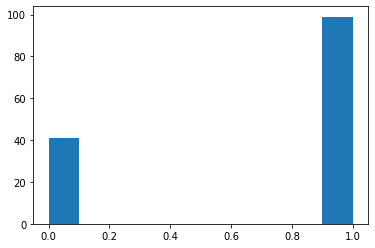

In [186]:
plt.hist(y)

1    58
0    41
Name: Results, dtype: int64


(array([41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

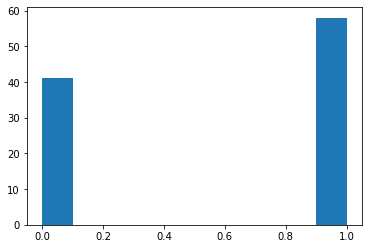

In [187]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.7, random_state=0)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0    58
1    58
Name: Results, dtype: int64


(array([58.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

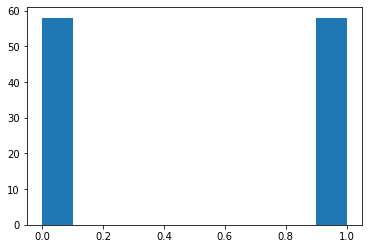

In [188]:
smt = SMOTE(random_state=0)
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [189]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=41)

Accuracy(%) =  83.33333333333334
Number of mislabeled points : 4 / 24
F1 Score (%) =  83.33333333333333
Precision (%) =  76.92307692307693
Recall (%) =  90.9090909090909


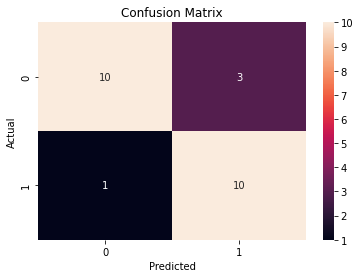

In [190]:
# creating a Nave Bayers classifier
model = GradientBoostingClassifier(random_state=0)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model.fit(X_train, Y_train)

# performing predictions on the test dataset
Y_pred = model.predict(X_test)



accuracy = sm.accuracy_score(Y_test, Y_pred)
precision = sm.precision_score(Y_test, Y_pred)
recall = sm.recall_score(Y_test, Y_pred)
f1_score = sm.f1_score(Y_test, Y_pred)
print("Accuracy(%) = ", accuracy*100)
print("Number of mislabeled points :",(Y_test != Y_pred).sum(),"/" ,  X_test.shape[0])
print("F1 Score (%) = ",f1_score*100)
print("Precision (%) = ",precision *100)
print("Recall (%) = ",recall*100)


cf_matrix = confusion_matrix(Y_test, Y_pred)
    

ax= plt.subplot()
sb.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 

